<a href="https://colab.research.google.com/github/CipherDavid/CipherDavid-ML_internship_codegnan/blob/main/Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DT_Classification**

In [14]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Import the datasets

dataset = pd.read_csv("/content/Social_Network_Ads.csv")

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[    54 104000]
 [    31  58000]
 [    53  82000]
 [    36  99000]
 [    23  48000]
 [    36  52000]
 [    37  62000]
 [    39 106000]
 [    43 112000]
 [    39  71000]
 [    32 100000]
 [    42  73000]
 [    57  33000]
 [    41  80000]
 [    41  60000]
 [    21  68000]
 [    41  59000]
 [    23  82000]
 [    31  34000]
 [    53 104000]
 [    28  85000]
 [    37 146000]
 [    24  58000]
 [    22  55000]
 [    35  50000]
 [    18  68000]
 [    25  87000]
 [    22  18000]
 [    30 116000]
 [    19  21000]
 [    31  15000]
 [    36  33000]
 [    46 117000]
 [    36 125000]
 [    57  26000]
 [    55  39000]
 [    35  23000]
 [    59  88000]
 [    36  63000]
 [    27  96000]
 [    20  74000]
 [    37  33000]
 [    35  72000]
 [    29  83000]
 [    35  50000]
 [    29  61000]
 [    52  21000]
 [    58 101000]
 [    24  27000]
 [    43 129000]
 [    42  70000]
 [    45  45000]
 [    37  70000]
 [    35  88000]
 [    33 149000]
 [    44  39000]
 [    28  79000]
 [    42  90000]
 [    28  5500

In [17]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train)
print(x_test)

[[ 1.55719117  1.00522455]
 [-0.62045029 -0.36346524]
 [ 1.4625111   0.35063378]
 [-0.14704997  0.85645392]
 [-1.3778908  -0.6610065 ]
 [-0.14704997 -0.54199   ]
 [-0.05236991 -0.24444874]
 [ 0.13699022  1.0647328 ]
 [ 0.51571047  1.24325756]
 [ 0.13699022  0.02333839]
 [-0.52577023  0.88620804]
 [ 0.42103041  0.08284664]
 [ 1.84123136 -1.10731839]
 [ 0.32635034  0.29112553]
 [ 0.32635034 -0.30395699]
 [-1.56725093 -0.06592399]
 [ 0.32635034 -0.33371112]
 [-1.3778908   0.35063378]
 [-0.62045029 -1.07756427]
 [ 1.4625111   1.00522455]
 [-0.90449048  0.43989616]
 [-0.05236991  2.25489784]
 [-1.28321073 -0.36346524]
 [-1.47257086 -0.45272762]
 [-0.24173004 -0.60149825]
 [-1.85129112 -0.06592399]
 [-1.18853067  0.49940441]
 [-1.47257086 -1.55363028]
 [-0.71513035  1.36227406]
 [-1.75661105 -1.4643679 ]
 [-0.62045029 -1.64289266]
 [-0.14704997 -1.10731839]
 [ 0.79975066  1.39202819]
 [-0.14704997  1.63006119]
 [ 1.84123136 -1.31559727]
 [ 1.65187123 -0.92879364]
 [-0.24173004 -1.40485965]
 

In [18]:
#Training a decision tree on the training dataset

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy')

classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
#Testing the classifier with test set data

y_pred  =  classifier.predict(x_test)

In [20]:
#Test and predict with a new result

print(classifier.predict(sc.transform([[30, 187000]])))

[1]


In [21]:
#Build confusion matrix and get accuracy of our model

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[45  8]
 [ 1 26]]


0.8875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


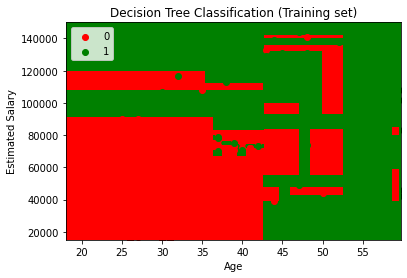

In [22]:
#Visualization using traing set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 0, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


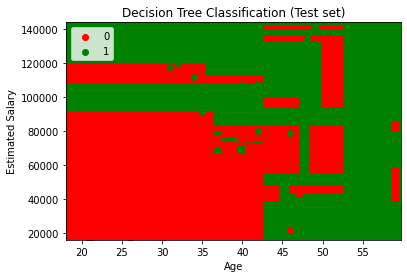

In [23]:
#Visualization using test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 0, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [24]:
#Training a decision tree on the training dataset

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 5)

classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [25]:
#Predicting test set results

y_pred = classifier.predict(x_test)

In [26]:
#Predicting test set results

y_pred = classifier.predict(x_test)

In [27]:
#Confusion Matrix and accuracy

cm = confusion_matrix(y_pred, y_test)

print(cm)

accuracy_score(y_pred, y_test)

[[43  2]
 [ 3 32]]


0.9375

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


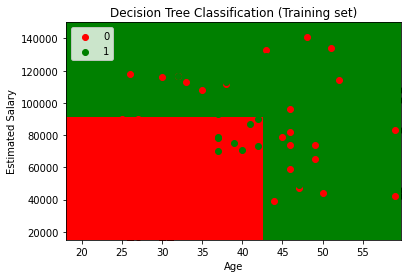

In [28]:
#Visualization using traing set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 0, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


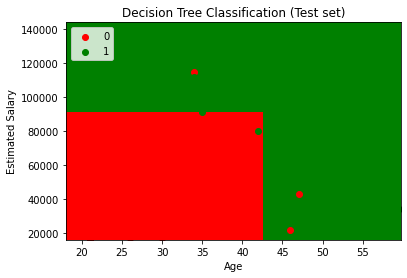

In [29]:
#Visualization using test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 0, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()